<a href="https://colab.research.google.com/github/SamuelGalaxys/PlayDataScrapping/blob/main/PlayCrawl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

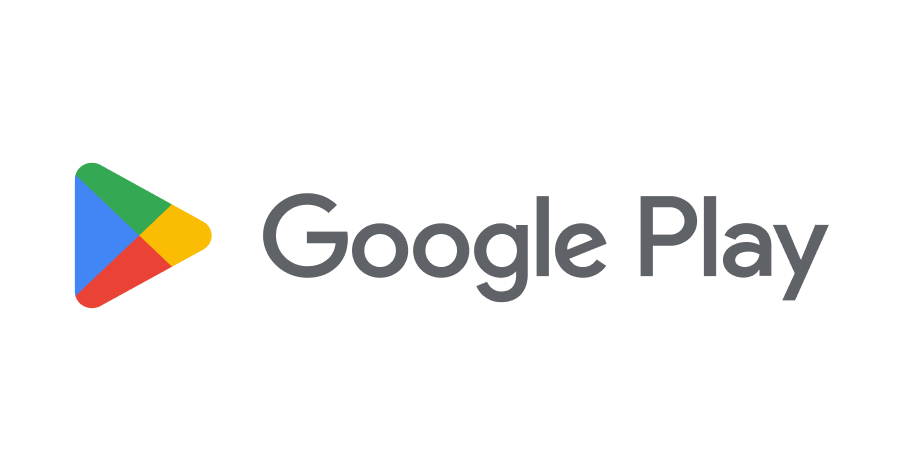

# **Google Play 리뷰 데이터 스크래핑**

### By Kihoon Kim

2024년 빅데이터의사결정분석 김기훈 박시현 전우빈 김민주 류기훈

In [ ]:
pip install requests beautifulsoup4


In [ ]:
# google_play_scraper 라이브러리 설치: 구글 플레이스토어에서 데이터를 쉽게 가져올 수 있게 해줍니다.
!pip install google_play_scraper

In [ ]:
from google_play_scraper import reviews_all
from datetime import datetime
import pandas as pd
from google.colab import drive
import time
from random import randint
from IPython.display import display, HTML

def get_package_name():
    package_name = input("앱의 패키지명을 입력하세요 (예: com.example.app): ")
    return package_name.strip()  # 앞뒤 공백 제거

package_name = get_package_name()

lang = 'ko'

cont = 'kr'

result = reviews_all(
    package_name,
    lang=lang,  # 리뷰의 언어를 설정합니다. 여기서는 위에서 설정한 'ko'(한국어)입니다.
    country=cont,  # 리뷰를 가져올 국가를 설정합니다. 여기서는 위에서 설정한 'kr'(한국)입니다.
    count=None  # 모든 리뷰를 가져오도록 설정합니다.
)

# 수집된 리뷰 데이터를 저장할 리스트 초기화
reviews_data = []

# 수집된 리뷰에 대해 반복하며 필요한 정보를 리스트에 저장
for item in result:
    # 리뷰 정보를 딕셔너리 형태로 저장
    review = {
        'score': item['score'],
        '리뷰내용': item['content'],
        '작성시간': item['at'],
        '사용자ID': item['userName'],
        '리뷰추천수': item['thumbsUpCount']  # 추가: 이 리뷰를 유용하다고 생각한 사람들의 수
    }
    reviews_data.append(review)

    # 요청 사이에 랜덤한 시간 지연 추가 (1초 ~ 5초 사이의 랜덤한 시간)
    delay = randint(0, 1)
    time.sleep(delay)

# 리스트를 pandas DataFrame으로 변환
df_reviews = pd.DataFrame(reviews_data)

# 별점을 기준으로 내림차순 정렬
df_reviews = df_reviews.sort_values(by='score', ascending=False)

# Google 드라이브에 마운트
drive.mount('/content/drive')

# Google 드라이브 경로 설정
drive_path = '/content/drive/My Drive/GooglePlayCrawl/'

# 저장될 파일 이름을 패키지명으로 설정
csv_filename = f"스토어리뷰_{package_name.replace('.', '_')}_크롤링.csv"

# 파일을 Google 드라이브에 저장
df_reviews.to_csv(drive_path + csv_filename, index=False, encoding='utf-8-sig')

print(f'All reviews saved to {drive_path + csv_filename}')


앱의 패키지명을 입력하세요 (예: com.example.app): com.kiwoom.heromts
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
All reviews saved to /content/drive/My Drive/GooglePlayCrawl/스토어리뷰_com_kiwoom_heromts_크롤링.csv


# 아래 기능은 현재 테스트 중입니다.

In [ ]:
from google_play_scraper import reviews_all
from datetime import datetime, timedelta
import pandas as pd
from google.colab import drive
import time
from random import randint
from IPython.display import display, HTML

def get_package_name():
    package_name = input("앱의 패키지명을 입력: ")
    return package_name.strip()  # 앞뒤 공백 제거
package_name = get_package_name()
lang = 'ko'
cont = 'kr'
one_year_ago = datetime.now() - timedelta(days=365)

result = reviews_all(
    package_name,
    lang=lang,
    country=cont,
    count=None
)

reviews_data = []
for item in result:
    review_date = item['at']
    if review_date >= one_year_ago:
        review = {
            'score': item['score'],
            '리뷰내용': item['content'],
            '작성시간': review_date,
            '사용자ID': item['userName'],
            '리뷰추천수': item['thumbsUpCount']
        }
        reviews_data.append(review)
        processer = randint(1, 3)
    time.sleep(processer)



df_reviews = pd.DataFrame(reviews_data)
df_reviews = df_reviews.sort_values(by='score', ascending=False)
drive.mount('/content/drive')
drive_path = '/content/drive/My Drive/GooglePlayCrawl/'
csv_filename = f"스토어리뷰_{package_name.replace('.', '_')}_최근1년_크롤링.csv"
df_reviews.to_csv(drive_path + csv_filename, index=False, encoding='utf-8-sig')
print(f'All reviews from the past year saved to {drive_path + csv_filename}')


앱의 패키지명을 입력: com.samsungpop.android.mpop


MessageError: Error: credential propagation was unsuccessful

In [ ]:
from google_play_scraper import reviews_all
from datetime import datetime
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML

# 패키지명을 입력받는 함수
def get_package_name():
    package_name = input("앱의 패키지명을 입력하세요 (예: com.example.app): ")
    return package_name.strip()  # 앞뒤 공백 제거

# 패키지명 입력 받기
package_name = get_package_name()

# 'lang'은 리뷰를 가져올 언어를 설정합니다. 여기서는 'ko'로 설정하여 한국어 리뷰를 가져옵니다.
lang = 'ko'

# 'cont'는 리뷰를 가져올 국가를 설정합니다. 여기서는 'kr'로 설정하여 한국에서의 리뷰를 가져옵니다.
cont = 'kr'

# reviews_all 함수를 사용해 앱의 모든 리뷰를 가져옵니다. count=None으로 설정하여 모든 리뷰를 가져옵니다.
result = reviews_all(
    package_name,
    lang=lang,  # 리뷰의 언어를 설정합니다. 여기서는 위에서 설정한 'ko'(한국어)입니다.
    country=cont,  # 리뷰를 가져올 국가를 설정합니다. 여기서는 위에서 설정한 'kr'(한국)입니다.
    count=None  # 모든 리뷰를 가져오도록 설정합니다.
)

# 수집된 리뷰 데이터를 저장할 리스트 초기화
reviews_data = []

# 수집된 리뷰에 대해 반복하며 필요한 정보를 리스트에 저장
for item in result:
    # 리뷰 정보를 딕셔너리 형태로 저장
    review = {
        'score': item['score'],
        '리뷰내용': item['content'],
        '작성시간': item['at'],
        '사용자ID': item['userName'],
        '리뷰추천수': item['thumbsUpCount']  # 추가: 이 리뷰를 유용하다고 생각한 사람들의 수
    }
    reviews_data.append(review)

# 리스트를 pandas DataFrame으로 변환
df_reviews = pd.DataFrame(reviews_data)

# 별점을 기준으로 내림차순 정렬
df_reviews = df_reviews.sort_values(by='score', ascending=False)

# Google 드라이브에 마운트
drive.mount('/content/drive')

# Google 드라이브 경로 설정
drive_path = '/content/drive/My Drive/GooglePlayCrawl/'

# 저장될 파일 이름을 패키지명으로 설정
csv_filename = f"앱리뷰_{package_name.replace('.', '_')}_크롤링.csv"

# 파일을 Google 드라이브에 저장
df_reviews.to_csv(drive_path + csv_filename, index=False, encoding='utf-8-sig')

print(f'All reviews saved to {drive_path + csv_filename}')


앱의 패키지명을 입력하세요 (예: com.example.app): com.kiwoom.heromts
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
All reviews saved to /content/drive/My Drive/GooglePlayCrawl/앱리뷰_com_kiwoom_heromts_크롤링.csv


In [ ]:
from google_play_scraper import reviews_all
from datetime import datetime
import pandas as pd

# 패키지명을 직접 입력할 수 있도록 변수 설정
package_name = 'com.samsungpop.android.mpop'

# 'lang'은 리뷰를 가져올 언어를 설정합니다. 여기서는 'ko'로 설정하여 한국어 리뷰를 가져옵니다.
lang = 'ko'

# 'cont'는 리뷰를 가져올 국가를 설정합니다. 여기서는 'kr'로 설정하여 한국에서의 리뷰를 가져옵니다.
cont = 'kr'

# reviews_all 함수를 사용해 앱의 모든 리뷰를 가져옵니다. count=None으로 설정하여 모든 리뷰를 가져옵니다.
result = reviews_all(
    package_name,
    lang=lang,  # 리뷰의 언어를 설정합니다. 여기서는 위에서 설정한 'ko'(한국어)입니다.
    country=cont,  # 리뷰를 가져올 국가를 설정합니다. 여기서는 위에서 설정한 'kr'(한국)입니다.
    count=None  # 모든 리뷰를 가져오도록 설정합니다.
)

# 수집된 리뷰 데이터를 저장할 리스트 초기화
reviews_data = []

# 수집된 리뷰에 대해 반복하며 필요한 정보를 리스트에 저장
for item in result:
    # 리뷰 정보를 딕셔너리 형태로 저장
    review = {
        'date': item['at'],
        'userName': item['userName'],
        'score': item['score'],
        'content': item['content'],
        'helpfulCount': item['thumbsUpCount']  # 추가: 이 리뷰를 유용하다고 생각한 사람들의 수
    }
    reviews_data.append(review)

# 리스트를 pandas DataFrame으로 변환
df_reviews = pd.DataFrame(reviews_data)

# 별점을 기준으로 내림차순 정렬
df_reviews = df_reviews.sort_values(by='score', ascending=False)

# 리뷰 데이터를 CSV 파일로 저장
from google.colab import drive
drive.mount('/content/drive')

# Google 드라이브 경로 설정
drive_path = '/content/drive/My Drive/'

# 저장될 파일 이름을 패키지명으로 설정
csv_filename = f"고정리뷰_{package_name.replace('.', '_')}_with_helpful_count.csv"

# 파일을 Google 드라이브에 저장
df_reviews.to_csv(drive_path + csv_filename, index=False, encoding='utf-8-sig')

print(f'All reviews saved to {drive_path + csv_filename}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
All reviews saved to /content/drive/My Drive/고정리뷰_com_samsungpop_android_mpop_with_helpful_count.csv


In [ ]:
#조상뻘 되는 원조 코드 (오류없음)


from google_play_scraper import reviews_all
from datetime import datetime
import pandas as pd

# 'lang'은 리뷰를 가져올 언어를 설정합니다. 여기서는 'ko'로 설정하여 한국어 리뷰를 가져옵니다.
lang = 'ko'

# 'cont'는 리뷰를 가져올 국가를 설정합니다. 여기서는 'kr'로 설정하여 한국에서의 리뷰를 가져옵니다.
cont = 'kr'

# reviews_all 함수를 사용해 앱의 모든 리뷰를 가져옵니다. count=None으로 설정하여 모든 리뷰를 가져옵니다.
result = reviews_all(
    'com.truefriend.neosmartarenewal',
    lang=lang,  # 리뷰의 언어를 설정합니다. 여기서는 위에서 설정한 'ko'(한국어)입니다.
    country=cont,  # 리뷰를 가져올 국가를 설정합니다. 여기서는 위에서 설정한 'kr'(한국)입니다.
    count=None  # 모든 리뷰를 가져오도록 설정합니다.
)

# 수집된 리뷰 데이터를 저장할 리스트 초기화
reviews_data = []

# 수집된 리뷰에 대해 반복하며 필요한 정보를 리스트에 저장
for item in result:
    # 리뷰 정보를 딕셔너리 형태로 저장
    review = {
        'date': item['at'],
        'userName': item['userName'],
        'score': item['score'],
        'content': item['content'],
        'helpfulCount': item['thumbsUpCount']  # 추가: 이 리뷰를 유용하다고 생각한 사람들의 수
    }
    reviews_data.append(review)

# 리스트를 pandas DataFrame으로 변환
df_reviews = pd.DataFrame(reviews_data)

# 별점을 기준으로 내림차순 정렬
df_reviews = df_reviews.sort_values(by='score', ascending=False)

# 리뷰 데이터를 CSV 파일로 저장
from google.colab import drive
drive.mount('/content/drive')

# Google 드라이브 경로 설정
drive_path = '/content/drive/My Drive/'

csv_filename = "All_Reviews_KihoonCrawlX_with_helpful_count.csv"  # 확장자를 추가해주세요

# 파일을 Google 드라이브에 저장
df_reviews.to_csv(drive_path + csv_filename, index=False, encoding='utf-8-sig')

print(f'All reviews saved to {drive_path + csv_filename}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
All reviews saved to /content/drive/My Drive/All_Reviews_KihoonCrawlX_with_helpful_count.csv
